[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ElMartinez31/Data_Science/blob/main/Course/Pytorch/Attention_Mecanism.ipynb)

**Mécanisme d'Attention dans les Transformers (BERT, GPT, etc.)**

Le mécanisme d'attention est le cœur des modèles comme BERT et GPT. Il permet au modèle de pondérer dynamiquement l'importance des mots dans une séquence en fonction du contexte.

1. Concepts de Base

a) Problème qu'il résout

Les modèles traditionnels (ex: RNNs) traitent les mots un par un (dans une séquence d'entrée), ce qui limite la compréhension des dépendances à long terme.

L'attention permet de relier directement n'importe quels mots dans une séquence, même s'ils sont éloignés.

b) Analogie

Imaginez que vous lisez une phrase :

"Le chat, qui était affamé, a mangé la souris."

Pour comprendre "a mangé", votre cerveau se concentre sur "chat" et "affamé" (plutôt que sur "était").

L'attention fait la même chose : elle calcule un score d'importance pour chaque mot.

2. Architecture d'Attention (Self-Attention)
Étapes clés :
1. Entrée : Embeddings des mots
Chaque mot est représenté par un vecteur (embedding) de dimension d_model (ex: 768 pour BERT-base).

Pour une séquence de n mots, on a une matrice X de taille (n, d_model).

2. Projection en Query (Q), Key (K), Value (V)

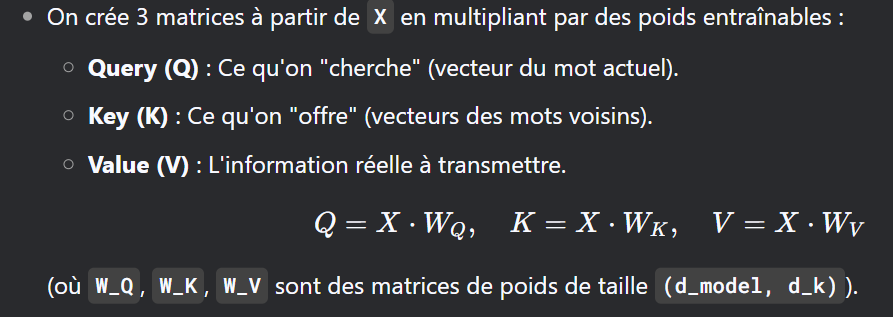

(où W_Q, W_K, W_V sont des matrices de poids de taille (d_model, d_k)).

3. Calcul des Scores d'Attention
Pour chaque mot, on compare sa Query avec les Keys des autres mots via un produit scalaire (similarité).

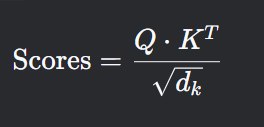



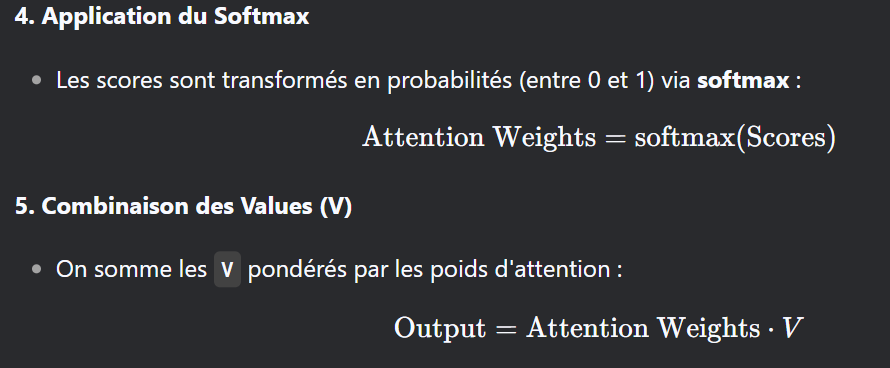

**3. Multi-Head Attention**

Pour capturer différents types de relations, on utilise plusieurs têtes d'attention en parallèle :

Plusieurs ensembles de Q, K, V (ex: 12 têtes pour BERT-base).

Chaque tête apprend des relations différentes (ex: une tête pour les accords grammaticaux, une autre pour les relations sémantiques).

Les sorties des têtes sont concaténées puis projetées linéairement.

4. Masked Attention (GPT vs BERT)

BERT : Attention bidirectionnelle (tous les mots voient tous les autres).

GPT : Attention masquée (masked) pour éviter que le modèle "triche" en regardant les mots futurs (unidirectionnel, left-to-right).

5. Positional Encoding

Comme l'attention ne traite pas les mots dans l'ordre, on ajoute des encodages positionnels aux embeddings pour indiquer la position des mots :

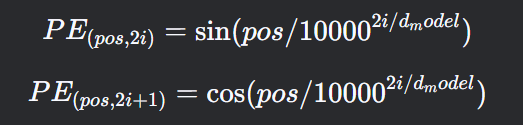

**Exemple Concret**

Query (Q), Key (K) et Value (V) peuvent paraître abstraites. Prenons un exemple concret avec une phrase simple pour bien illustrer le mécanisme.

Exemple : Phrase "Le chat mange la souris"
Prenons une séquence de 4 mots : [Le, chat, mange, la, souris] (n=5).
Chaque mot est représenté par un embedding de dimension d_model=4 (pour simplifier).


In [ ]:
#1. Embeddings d'entrée (X)
#Matrice X de taille (5, 4) :

Le   = [0.1, 0.2, 0.3, 0.4]
chat = [0.5, 0.6, 0.7, 0.8]
mange= [0.9, 1.0, 1.1, 1.2]
la   = [1.3, 1.4, 1.5, 1.6]
souris=[1.7, 1.8, 1.9, 2.0]

2. Projection en Q, K, V
Supposons des poids W_Q, W_K, W_V de taille (4, 3) (donc d_k=3).
**les valeurs exactes dépendent des poids Wq,Wk et Wv sont initialisées aléatoirement puis ajustées pendant l'entraînement.**

Query (Q) : Représente "ce que le mot actuel cherche à savoir".

Exemple : Pour le mot chat, Q est un vecteur qui encode la question implicite : "Quels autres mots sont pertinents pour moi ?"

Key (K) : Représente "ce que chaque mot peut offrir".

Exemple : Pour le mot mange, K est un vecteur qui encode : "Je peux fournir des informations sur l'action de manger".

Value (V) : Contient l'information réelle à transmettre.

Exemple : Pour souris, V encode le sens réel du mot (rongeur, proie, etc.).

Calcul (pour un mot, disons chat) :



In [ ]:
Q_chat = embedding_chat ⋅ W_Q = [0.5,0.6,0.7,0.8] ⋅ W_Q → [1.2, 0.5, -0.3]
K_mange = embedding_mange ⋅ W_K = [0.9,1.0,1.1,1.2] ⋅ W_K → [0.8, 1.1, 0.4]
V_mange = embedding_mange ⋅ W_V = [0.9,1.0,1.1,1.2] ⋅ W_V → [1.0, -0.2, 0.7]

3. Calcul des Scores d'Attention

On compare Q_chat avec tous les K (y compris lui-même) :

In [ ]:
Score(chat, chat) = Q_chat ⋅ K_chat^T ≈ 1.2*0.9 + 0.5*0.8 + (-0.3)*0.7 = 1.33
Score(chat, mange) = Q_chat ⋅ K_mange^T ≈ 1.2*0.8 + 0.5*1.1 + (-0.3)*0.4 = 1.39

#Normalisation (sqrt(3) = 1.73)

Scores = [1.33/1.73, 1.39/1.73, ...] ≈ [0.77, 0.80, ...]

4. Softmax

Transforme les scores en probabilités (exemple simplifié) :

In [ ]:
#Attention Weights = softmax([0.77, 0.80, ...]) ≈ [0.25, 0.26, ...]
#→ Le mot chat "fait attention" à mange avec un poids de 0.26.

5. Combinaison des Values

On somme les V pondérées par les poids :

In [ ]:
#Output_chat = 0.25*V_le + 0.26*V_chat + 0.26*V_mange + ...

#→ Le nouveau vecteur de sortie (output) de chat intègre maintenant des informations contextuelles (ex: lien avec mange et souris).

#Embedding initial : Comme connaître la définition du mot "chat" dans un dictionnaire (hors contexte).
#Vecteur après attention : Comme comprendre "chat" dans la phrase "Le chat mange la souris" (en lien avec les autres mots).

→ La self-attention enrichit la représentation initiale avec des informations locales.

#Analogie:
La self-attention est comme une recette de cuisine.
Le vecteur de sortie est le gâteau final. (Output)

In [ ]:

Embedding initial ("chat")   →   [0.5, 0.6, 0.7, 0.8] (statique)
            ↓
Self-Attention (intègre "mange" et "souris")
            ↓
Vecteur contextuel ("chat") →   [1.1, -0.3, 0.8, 2.0] (dynamique)


A ce moment nous avons notre vecteur d'output pour chat.

Prochaines étapes:

1. Post-Traitement Immédiat après la Self-Attention

(a) Ajout d'un Résidu (Skip Connection)
Le vecteur output_chat est combiné avec l'embedding original de "chat" pour éviter la perte d'information :

In [ ]:
output_residual = embedding_chat + output_chat  # Addition élémentaire



(b) Normalisation (LayerNorm)

Le résultat est normalisé pour stabiliser l'apprentissage :



In [ ]:
output_norm = LayerNorm(output_residual)  # Normalise moyenne/variance

2. Passage à travers un FFN (Feed-Forward Network)

Chaque mot subit ensuite une transformation par un réseau de neurones simple (FFN) pour ajouter de la non-linéarité :

In [ ]:
output_ffn = FFN(output_norm)  # Exemple : FFN(x) = ReLU(x·W1 + b1)·W2 + b2

#W1, W2 : Matrices de poids (dimensions typiques : d_model × d_ff où d_ff = 2048 pour BERT-base).
#Fonction : Capture des interactions complexes dans l'espace latent.

(c) Nouveau Résidu + Normalisation

In [ ]:
final_output = LayerNorm(output_ffn + output_norm)

3. Empilement dans les Couches Suivantes

Le final_output devient l'entrée de la couche suivante du Transformer (il y a typiquement 12 ou 24 couches empilées dans BERT/GPT).

À chaque couche, le vecteur de "chat" est réenrichi par de nouvelles interactions contextuelles.

4. Utilisation Finale du Vecteur

En fonction de la tâche, le vecteur final est exploité différemment :

(a) Pour la Classification (ex : Analyse de Sentiment)
On prend le vecteur du token [CLS] (en début de phrase) et on lui applique une couche linéaire :

(b) Pour la Traduction ou Génération de Texte (GPT)
Le vecteur est projeté dans l'espace du vocabulaire pour prédire le mot suivant :

(c) Pour l'Embedding Contextuel (BERT)

In [ ]:
# pour (a)
logits = final_output[CLS] · W_classification

#pour (b)
logits = final_output_chat · W_vocab  # W_vocab de taille (d_model × vocab_size)

#pour (c)
Le final_output de "chat" est utilisé directement comme représentation contextuelle (ex : pour l'extraction d'entités).

In [ ]:
# Recap

Embedding "chat" →
Self-Attention →
Add & Norm →
FFN →
Add & Norm →
... (×N couches) →
  Sortie finale
                      ↓
Tâche spécifique (classification, génération, etc.) ((a), (b), (c) par ex)

Pourquoi ces Étapes ?

Skip-Connection : Évite le vanishing gradient.

LayerNorm : Stabilise l'échelle des valeurs.

FFN : Ajoute de la capacité de modélisation.

Empilement : Capture des dépendances à long terme (ex : "chat" → "souris" à travers plusieurs mots).

Résumé en Une Phrase

In [ ]:
# A ne pas confondre:

   Tête d'attention                    	                                   Attention mask
C’est une partie du modèle	                                           C’est une entrée donnée au modèle
Plusieurs têtes apprennent des choses différentes	                     Le masque bloque ou autorise certains liens entre tokens
Paramètres appris pendant l'entraînement	                             Ce sont des valeurs fixes (souvent juste 0 ou 1)
Ex : tête 1 regarde la syntaxe, tête 2 regarde la coréférence,...   	 Ex : ne pas regarder les [PAD], ou cacher les tokens futurs dans GPT